#**Özet**
###Bu çalışmada 2005-2007, 2009-2011, 2012-2014 arasında gerçekleşen trafik kazaları (accidents) ile söz konusu yıllardaki ortalama günlük trafik yoğunluğu (AADF) veri setleri üzerinden, İngiltere'de meydana gelen trafik kazaları incelenmiştir.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deryasakoztorun","key":"332adefd4a300676d7aa7d91c0935142"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle
!kaggle datasets download -d daveianhickey/2000-16-traffic-flow-england-scotland-wales

Dataset URL: https://www.kaggle.com/datasets/daveianhickey/2000-16-traffic-flow-england-scotland-wales
License(s): DbCL-1.0
 79% 104M/132M [00:00<00:00, 1.08GB/s]
100% 132M/132M [00:00<00:00, 966MB/s] 


In [ ]:
!unzip 2000-16-traffic-flow-england-scotland-wales.zip

Archive:  2000-16-traffic-flow-england-scotland-wales.zip
  inflating: Areas.shp               
  inflating: Local_Authority_Districts_Dec_2016.geojson  
  inflating: accident_coords_update.ipynb  
  inflating: accidents_2005_to_2007.csv  
  inflating: accidents_2009_to_2011.csv  
  inflating: accidents_2012_to_2014.csv  
  inflating: ukTrafficAADF.csv       


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_1 = pd.read_csv("accidents_2005_to_2007.csv", low_memory=False)

In [ ]:
df_2 = pd.read_csv("accidents_2009_to_2011.csv", low_memory=False)

In [ ]:
df_3 = pd.read_csv("accidents_2012_to_2014.csv", low_memory=False)

In [ ]:
print(df_1.columns.equals(df_2.columns) and df_1.columns.equals(df_3.columns)) # Veri setlerindeki sütunların aynı olup olmadığı kontrol edildi

True


In [ ]:
df_4 = pd.read_csv("ukTrafficAADF.csv", low_memory=False)

In [ ]:
df_acc = pd.concat([df_1, df_2, df_3], ignore_index=True) # 'True' ile sütunların aynı olduğu tespit edildiğinden, tüm kaza dosyaları tek bir set olarak birleştirildi

In [ ]:
df_acc.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [ ]:
df_acc.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
1504145,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,NaN,NaN,2,Yes,NaN,2014
1504146,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,NaN,NaN,2,Yes,NaN,2014
1504147,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,NaN,NaN,2,Yes,NaN,2014
1504148,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,NaN,NaN,2,Yes,NaN,2014
1504149,2.01E+12,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,24/12/2014,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,NaN,NaN,2,Yes,NaN,2014


In [ ]:
df_4.head()

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


In [ ]:
df_4.tail()

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
275380,2016,99736,Estimated,Estimated using previous year's AADF on this link,East Midlands,Derbyshire,A625,PR,426800,379200,...,70,18,141,5,9,26,268,5358,53.309068,-1.599252
275381,2016,99756,Estimated,Estimated using previous year's AADF on this link,East Midlands,Derbyshire,A50,TR,442752,330100,...,1236,285,342,339,2092,2161,6454,63447,52.866690,-1.366373
275382,2016,99941,Estimated,Estimated using previous year's AADF on this link,East Midlands,Northamptonshire,A4500,PR,484000,264310,...,80,22,4,3,9,5,124,9281,52.270539,-0.770410
275383,2016,99942,Counted,Manual count,East Midlands,Rutland,A6003,PR,486340,296000,...,114,10,41,31,80,59,335,6602,52.555003,-0.727959
275384,2016,99967,Estimated,Estimated using previous year's AADF on this link,East Midlands,Leicester,A563,PU,461390,307690,...,730,142,175,66,277,253,1643,21470,52.663461,-1.093733


#**Eksik Değer Analizi**

In [ ]:
df_acc.shape

(1504150, 33)

In [ ]:
from IPython.display import display

null_count = df_acc.isnull().sum()
null_rate = df_acc.isnull().mean()

missing_values_df = pd.DataFrame({
    'Eksik Değer Sayısı': null_count,
    'Eksik Değer Yüzdesi': (null_rate * 100).round(2)
}).sort_values(by='Eksik Değer Yüzdesi', ascending=False)

display(missing_values_df)

,Eksik Değer Sayısı,Eksik Değer Yüzdesi
Junction_Detail,1504150,100.00
Carriageway_Hazards,1476900,98.19
Special_Conditions_at_Site,1467568,97.57
Junction_Control,602835,40.08
LSOA_of_Accident_Location,108238,7.20
Did_Police_Officer_Attend_Scene_of_Accident,2922,0.19
Road_Surface_Conditions,1958,0.13
Weather_Conditions,126,0.01
Location_Easting_OSGR,101,0.01
Time,117,0.01


###Trafik kazaları veri setinde sağlıklı bir analiz yapabilmek amacıyla, %80'dan fazla eksik değer barındıran sütunlar silinmelidir:

In [ ]:
cols_to_drop = df_acc.isnull().mean()[df_acc.isnull().mean() > 0.80].index

df_acc.drop(columns=cols_to_drop, inplace=True)

print(f"Kalan sütun sayısı: {df_acc.shape[1]}")

Kalan sütun sayısı: 30


In [ ]:
df_4.shape

(275385, 29)

In [ ]:
null_count = df_4.isnull().sum()
null_rate = df_4.isnull().mean()

missing_values_df_4 = pd.DataFrame({
    'Eksik Değer Sayısı': null_count,
    'Eksik Değer Yüzdesi': (null_rate * 100).round(2)
}).sort_values(by='Eksik Değer Yüzdesi', ascending=False)

display(missing_values_df_4)

,Eksik Değer Sayısı,Eksik Değer Yüzdesi
Estimation_method,37573,13.64
Estimation_method_detailed,37573,13.64
EndJunction,238,0.09
StartJunction,256,0.09
AADFYear,0,0.00
Region,0,0.00
CP,0,0.00
LocalAuthority,0,0.00
Road,0,0.00
Easting,0,0.00


###Yıllık ortalama günlük araç geçiş miktarı veri setinde düşük oranda eksik değer olup işlem yapılmamıştır.

#**Aykırı Değer Analizi**

###Trafik kazaları veri setindeli değişkenlerin istatistiki değerleri ile aykırı değer sayı ve oranları şöyledir:

In [ ]:
df_acc.describe().T.round(2).applymap(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

/tmp/ipython-input-33-1982672289.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_acc.describe().T.round(2).applymap(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))


,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,"1.504.049,00","439.621,41","95.116,16","64.950,00","375.060,00","439.960,00","523.060,00","655.370,00"
Location_Northing_OSGR,"1.504.049,00","300.158,40","161.008,38","10.290,00","178.260,00","268.830,00","398.151,00","1.208.800,00"
Longitude,"1.504.049,00","-1,44","1,40","-7,52","-2,37","-1,40","-0,22","1,76"
Latitude,"1.504.049,00","52,59","1,45","49,91","51,49","52,31","53,48","60,76"
Police_Force,"1.504.150,00","30,21","25,52","1,00","6,00","30,00","45,00","98,00"
Accident_Severity,"1.504.150,00","2,84","0,40","1,00","3,00","3,00","3,00","3,00"
Number_of_Vehicles,"1.504.150,00","1,83","0,71","1,00","1,00","2,00","2,00","67,00"
Number_of_Casualties,"1.504.150,00","1,35","0,83","1,00","1,00","1,00","1,00","93,00"
Day_of_Week,"1.504.150,00","4,12","1,92","1,00","2,00","4,00","6,00","7,00"
Local_Authority_(District),"1.504.150,00","347,61","259,43","1,00","110,00","322,00","518,00","941,00"


In [ ]:
numeric_cols = df_acc.select_dtypes(include=['float64', 'int64']).columns

outlier_df = pd.DataFrame(columns=["Aykırı Değer Sayısı", "Aykırı Değer Oranı"])

for col in numeric_cols:
    Q1 = df_acc[col].quantile(0.25)
    Q3 = df_acc[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_acc[(df_acc[col] < lower_bound) | (df_acc[col] > upper_bound)]
    count = outliers.shape[0]
    rate = count / df_acc.shape[0]

    outlier_df.loc[col] = [count, round(rate * 100, 2)]

outlier_df = outlier_df.sort_values(by="Aykırı Değer Oranı", ascending=False)

from IPython.display import display
display(outlier_df)

,Aykırı Değer Sayısı,Aykırı Değer Oranı
Number_of_Casualties,350294.0,23.29
2nd_Road_Number,339045.0,22.54
1st_Road_Number,270140.0,17.96
Accident_Severity,223945.0,14.89
Number_of_Vehicles,34081.0,2.27
Location_Northing_OSGR,20977.0,1.39
Latitude,20209.0,1.34
Location_Easting_OSGR,1659.0,0.11
Longitude,1140.0,0.08
Day_of_Week,0.0,0.00


###Ortalama günlük trafik yoğunluğu setindeli değişkenlerin istatistiki değerleri ile aykırı değer sayı ve oranları şöyledir:

In [ ]:
df_4.describe().T.round(2).applymap(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

/tmp/ipython-input-42-2446199177.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_4.describe().T.round(2).applymap(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))


,count,mean,std,min,25%,50%,75%,max
AADFYear,"275.385,00","2.007,97","4,86","2.000,00","2.004,00","2.008,00","2.012,00","2.016,00"
CP,"275.385,00","47.277,49","27.004,89","60,00","26.218,00","47.252,00","74.392,00","99.967,00"
Easting,"275.385,00","425.675,25","98.687,57","69.987,00","352.970,00","430.000,00","510.600,00","655.040,00"
Northing,"275.385,00","356.182,61","186.992,30","76.250,00","192.120,00","324.000,00","429.600,00","1.205.400,00"
LinkLength_km,"275.385,00","2,76","3,82","0,07","0,60","1,40","3,20","55,50"
LinkLength_miles,"275.385,00","1,71","2,37","0,04","0,37","0,87","1,99","34,49"
PedalCycles,"275.385,00","123,31","421,44","0,00","5,00","26,00","83,00","18.629,00"
Motorcycles,"275.385,00","222,10","420,87","0,00","58,00","113,00","214,00","9.815,00"
CarsTaxis,"275.385,00","16.813,33","16.618,27","0,00","7.125,00","12.255,00","19.951,00","207.133,00"
BusesCoaches,"275.385,00","248,66","374,65","0,00","60,00","127,00","280,00","11.359,00"


In [ ]:
numeric_cols = df_4.select_dtypes(include=['float64', 'int64']).columns

outlier_df = pd.DataFrame(columns=["Aykırı Değer Sayısı", "Aykırı Değer Oranı"])

for col in numeric_cols:
    Q1 = df_4[col].quantile(0.25)
    Q3 = df_4[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_4[(df_4[col] < lower_bound) | (df_4[col] > upper_bound)]
    count = outliers.shape[0]
    rate = count / df_4.shape[0]

    outlier_df.loc[col] = [count, round(rate * 100, 2)]

outlier_df = outlier_df.sort_values(by="Aykırı Değer Oranı", ascending=False)

from IPython.display import display
display(outlier_df)

,Aykırı Değer Sayısı,Aykırı Değer Oranı
V6orMoreAxleArticHGV,39637.0,14.39
V5AxleArticHGV,39475.0,14.33
V3or4AxleArticHGV,34083.0,12.38
AllHGVs,33162.0,12.04
PedalCycles,29946.0,10.87
V2AxleRigidHGV,27750.0,10.08
V3AxleRigidHGV,27146.0,9.86
V4or5AxleRigidHGV,26754.0,9.72
LinkLength_miles,26232.0,9.53
LinkLength_km,26232.0,9.53


#**Trafik Yoğunluğunun Kazalara Etkisi**

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Koordinatları aldık (aynı sütun adları olacak şekilde)
acc_coords = df_acc[['Location_Easting_OSGR', 'Location_Northing_OSGR']].dropna()
aadf_coords = df_4[['Easting', 'Northing']].dropna()

# Sütun adlarını aynı yaptık (eşleştirme modeli için)
acc_coords.columns = ['Easting', 'Northing']
aadf_coords.columns = ['Easting', 'Northing']

# Eşleştirme modelini oluşturduk
nn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(aadf_coords)
distances, indices = nn.kneighbors(acc_coords)

# Her kazaya en yakın yol segmentini eşleştirdik
matched_aadf = df_4.iloc[indices.flatten()].reset_index(drop=True)

# Kaza verilerini eşleştirilmiş AADF ile birleştirdik
df_acc_filtered = df_acc.loc[acc_coords.index].reset_index(drop=True)
df_acc_filtered['AADF'] = matched_aadf['AllMotorVehicles'].values

##**Trafik Yoğunluğu ile Kaza Şiddeti İlişkisi**

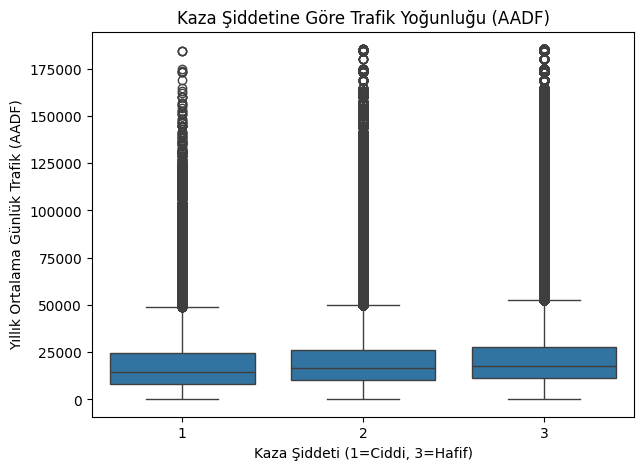

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Accident_Severity', y='AADF', data=df_acc_filtered)
plt.title("Kaza Şiddetine Göre Trafik Yoğunluğu (AADF)")
plt.xlabel("Kaza Şiddeti (1=Ciddi, 3=Hafif)")
plt.ylabel("Yıllık Ortalama Günlük Trafik (AADF)")
plt.show()

###Kaza Şiddetine Göre Yıllık Ortalama Trafik Yoğunluğu (AADF)

**• Ortanca (medyan):**  
Kaza şiddeti 1 (en ciddi) olan kazaların meydana geldiği bölgelerde yıllık ortalama trafik miktarı, diğer şiddet düzeylerine kıyasla biraz daha düşüktür. Şiddet arttıkça (yani 1 → 3) medyan değer hafifçe artmaktadır.

**• Ortalama:**  
Boxplot doğrudan ortalamayı göstermese de, kutuların üst sınırındaki artış, şiddet seviyesi arttıkça ortalamanın da bir miktar arttığını düşündürebilir.

**• Dağılım:**  
Tüm şiddet kategorilerinde trafik yoğunluğu oldukça değişkendir. Özellikle 3 numaralı (hafif kaza) grubu daha yüksek aykırı değerlere sahiptir. Bu da daha yoğun trafikli bölgelerde hafif kazaların daha sık görüldüğünü düşündürebilir.

###Genel olarak, trafik yoğunluğu arttıkça kaza şiddetinin azaldığı gözlemlenmektedir. Bu durum, düşük hızla akan yoğun trafikte daha hafif kazaların gerçekleştiğini gösterebilir. Ancak istisnalar ve aykırı değerlerin varlığı, bu ilişkinin karmaşık olabileceğini de hatırlatır.

##**Trafik Yoğunluğu ile Kazazede Sayısı İlişkisi**

In [ ]:
corr = df_acc_filtered[['AADF', 'Number_of_Casualties']].corr().iloc[0,1]
print(f"AADF ile kazazede sayısı arasındaki korelasyon: {corr:.2f}")

AADF ile kazazede sayısı arasındaki korelasyon: 0.01


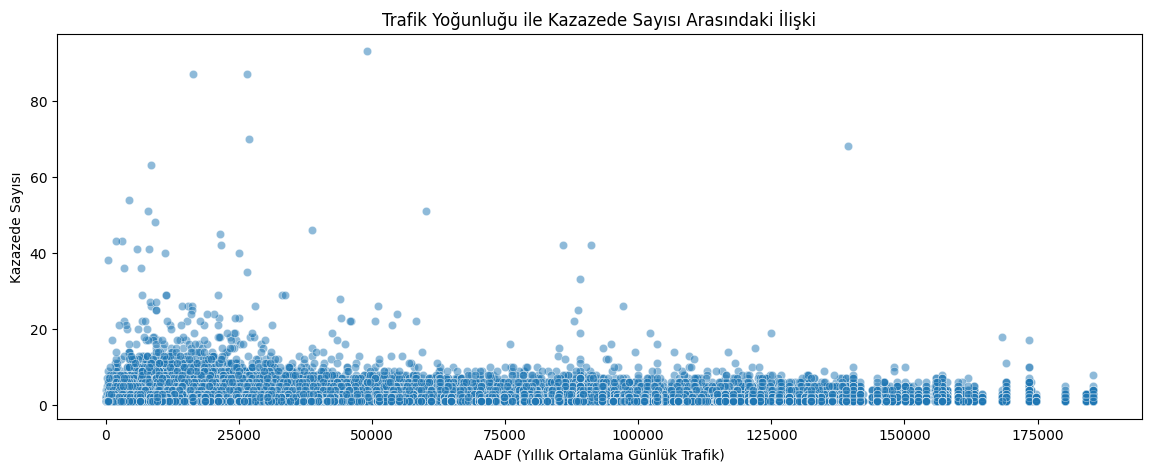

In [ ]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='AADF', y='Number_of_Casualties', data=df_acc_filtered, alpha=0.5)
plt.title("Trafik Yoğunluğu ile Kazazede Sayısı Arasındaki İlişki")
plt.xlabel("AADF (Yıllık Ortalama Günlük Trafik)")
plt.ylabel("Kazazede Sayısı")
plt.show()

###Trafik Yoğunluğu ile Kazazede Sayısı Arasındaki İlişki

**• Genel Görünüm:**  
Grafik, trafik yoğunluğu (AADF) ile kazazede sayısı arasında net bir doğrusal ilişki olmadığını göstermektedir. Veri noktalarının büyük kısmı, düşük trafik yoğunluklarında toplanmıştır.

**• Aykırı Noktalar:**  
Düşük AADF değerlerine sahip birçok segmentte yüksek sayıda kazazede (örneğin 60-90 kişi) gözlenmiştir. Bu durum, düşük yoğunluklu ama belki de yüksek hız yapılan yolların daha ölümcül kazalara neden olabileceğini düşündürebilir.

**• Yüksek Yoğunlukta Yoğunluk:**  
AADF değeri arttıkça, kazazede sayısının genellikle düşük kaldığı görülmektedir. Bu durum, yoğun trafikte daha az ölümcül kaza olabileceğini ima eder (örneğin şehir içi yavaş akan trafik).

###Trafik yoğunluğu tek başına kazazede sayısını belirleyen bir faktör değildir. Kazazede sayısını etkileyen diğer değişkenlerin (hız sınırı, yol tipi, sürücü davranışı vs.) dikkate alınması gereklidir. Ancak düşük AADF değerlerinde bile yüksek kazazede sayılarına rastlanması, bazı yol segmentlerinin özellikle riskli olabileceğine işaret eder.

#**Kaza Oranlarını Arttıran Faktörler**

##**Hava Durumu ve Kaza Şiddeti**

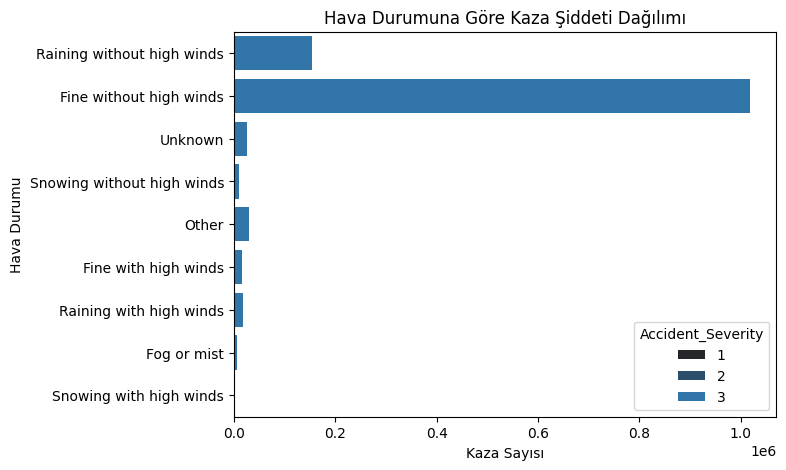

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_acc, y='Weather_Conditions', hue='Accident_Severity', palette='dark:#1e77bd', dodge=False)
plt.title("Hava Durumuna Göre Kaza Şiddeti Dağılımı")
plt.ylabel("Hava Durumu")
plt.xlabel("Kaza Sayısı")
plt.show()

###Hava Durumuna Göre Kaza Şiddeti Dağılımı

**• Genel Gözlem:**
- Kazaların büyük çoğunluğu **"Fine without high winds" (Rüzgarsız açık hava)** koşullarında meydana gelmiştir.
- Bu, kazaların çoğunun **iyi hava koşullarında gerçekleştiğini** göstermektedir.

**• Kaza Şiddeti Dağılımı:**
- Her hava koşulunda, en fazla sayıda kaza **şiddet seviyesi 3 (hafif)** kategorisinde yer almaktadır.
- **Raining without high winds (Rüzgarsız yağmur)** sırasında da hatırı sayılır bir kaza sayısı gözlenmektedir.

**• Düşük Görülen Durumlar:**
- **"Snowing", "Fog or mist"** gibi zorlu hava koşullarında kaza sayıları görece düşüktür.
- Bu durum, sürücülerin **kötü hava koşullarında daha dikkatli olması veya trafiğe daha az çıkması** ile açıklanabilir.

###- Hava durumu doğrudan kaza sebebi olmaktan ziyade, **trafiğin yoğun olduğu zamanlardaki genel koşulların** (örneğin açık hava) etkili olduğunu göstermektedir.
###- Önleyici tedbirler sadece kötü hava koşullarına değil, **iyi hava koşullarındaki yoğun trafik ortamlarına** da odaklanmalıdır.

##**Yol Tipi ve Kaza Şiddeti**

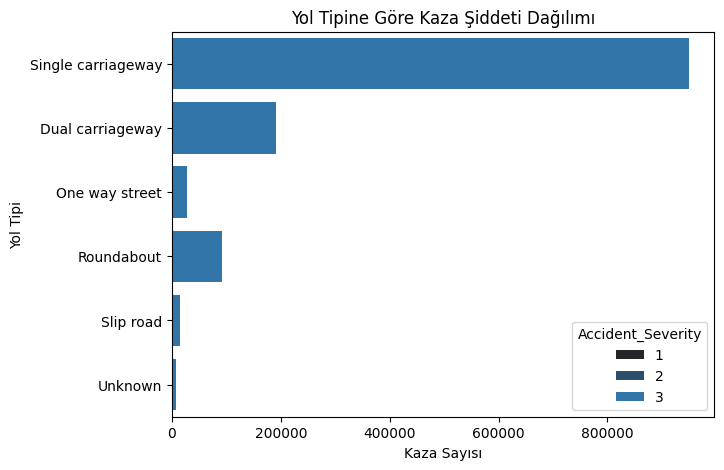

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_acc, y='Road_Type', hue='Accident_Severity', palette='dark:#1e77bd', dodge=False)
plt.title("Yol Tipine Göre Kaza Şiddeti Dağılımı")
plt.xlabel("Kaza Sayısı")
plt.ylabel("Yol Tipi")
plt.show()

###Yol Tipine Göre Kaza Şiddeti Dağılımı

**• En çok kazanın gerçekleştiği yol tipi:**  
- **Single carriageway (tek yönlü çift şeritli yollar)** açık ara farkla en fazla kazaya sahne olan yol tipidir.

**• Diğer yol türlerine göre sıralama:**  
- Single carriageway > Dual carriageway > Roundabout > One way street > Slip road > Unknown

**• Kaza şiddeti dağılımı:**  
- Tüm yol tiplerinde en fazla görülen kaza şiddeti **3 (hafif kazalar)**.
- Özellikle **Single carriageway** yollarında ciddi kazalar (şiddet=1) ve orta şiddetli kazalar (şiddet=2) da diğer yollara göre daha fazladır.

###- Tek yönlü çift şeritli yollar (Single carriageway), trafik yoğunluğu ve yol altyapısının yetersizliği gibi nedenlerle kazaların en sık yaşandığı yol tipi olabilir.
###- Karayolu güvenliği açısından en yüksek öncelik bu yolların düzenlenmesi ve denetlenmesi olmalıdır.

##**Aydınlatma Koşulları ve Kaza Şiddeti**

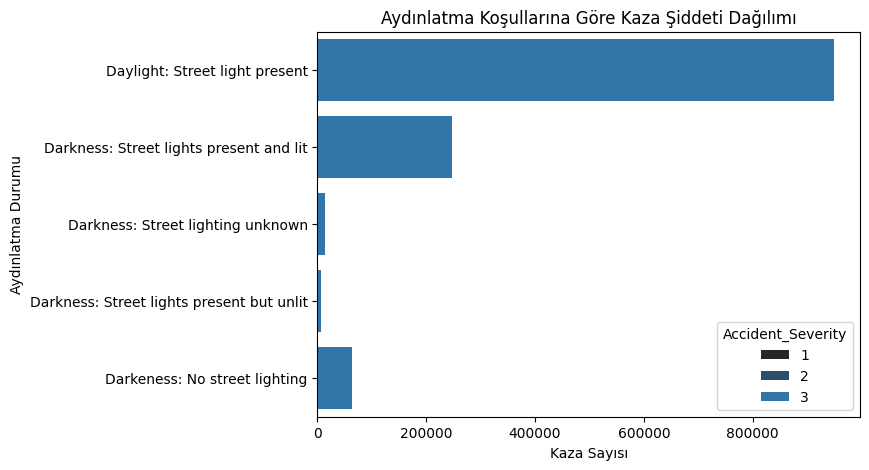

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_acc, y='Light_Conditions', hue='Accident_Severity', palette='dark:#1e77bd', dodge=False)
plt.title("Aydınlatma Koşullarına Göre Kaza Şiddeti Dağılımı")
plt.xlabel("Kaza Sayısı")
plt.ylabel("Aydınlatma Durumu")
plt.show()

###Aydınlatma Koşullarına Göre Kaza Şiddeti Dağılımı

**• En çok kaza**, açıkça **gündüz vakti ve sokak lambalarının mevcut olduğu** (Daylight: Street light present) durumlarda gerçekleşmiştir.

**• İkinci sırada**, **gece vakti ama sokak lambalarının yandığı** (Drkness: Strees lights present and lit) koşullarda meydana gelen kazalar yer alıyor.

**• Aydınlatmanın hiç olmadığı** (Darkness: No street lighting) ya da **lambaların yanmadığı** (Darknes: Strees lights present but unlit) durumlarda toplam kaza sayısı düşük olmasına rağmen, **oransal olarak daha ciddi kazalar** görülmektedir.

###- Aydınlatmanın olduğu alanlarda daha fazla kaza oluyor; bu muhtemelen bu alanların daha yoğun trafiğe sahip olmasıyla ilişkilidir.
###- Ancak aydınlatma eksikliği olan yerlerde kaza sayısı az olsa da **kaza ciddiyeti daha yüksek** olabilir. Bu da bu alanların güvenlik açısından daha riskli olduğunu düşündürür.

##**Gün ve Saate Göre Kaza Şiddeti**

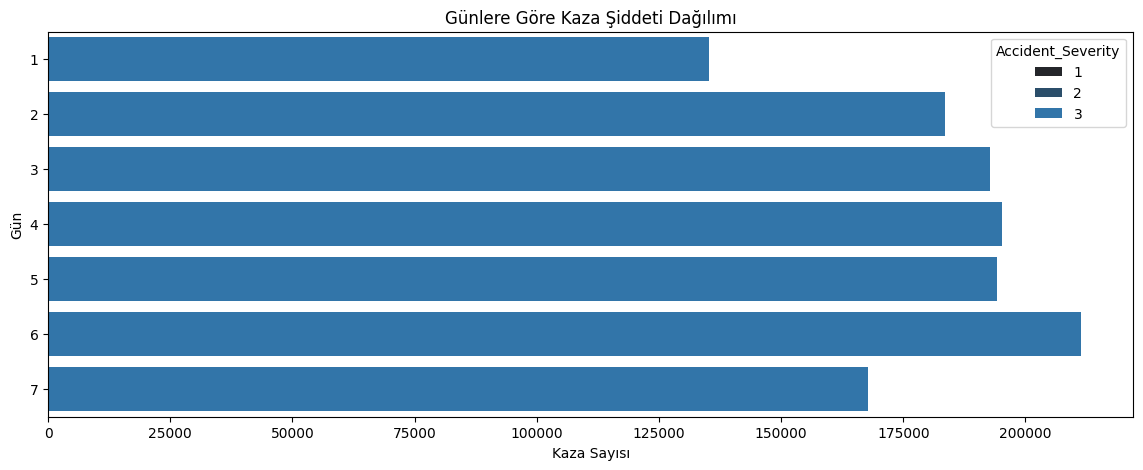

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(data=df_acc, y='Day_of_Week', hue='Accident_Severity', palette='dark:#1e77bd', dodge=False)
plt.title("Günlere Göre Kaza Şiddeti Dağılımı")
plt.xlabel("Kaza Sayısı")
plt.ylabel("Gün")
plt.show()

###Günlere Göre **Kaza Şiddeti** Dağılımı

**Ortanca:**
- Haftanın ortası olan Çarşamba ve Perşembe (gün 3 ve 4), kaza sayılarında ortalama seviyelerde yer alıyor.

**Ortalama:**
- En yüksek kaza sayısı Cumartesi (gün 6) gününde görülmektedir.
- En düşük kaza sayısı Pazar (gün 1) gününde kaydedilmiştir.

**Dağılım:**
- Pazartesi'den itibaren kaza sayısı artış eğilimi göstermekte, hafta sonuna yaklaştıkça zirveye ulaşmaktadır.
- Tüm günlerde en yaygın kaza şiddeti tipi **'3'** (muhtemelen en hafif olan) seviyesindedir.

###- Hafta içi (özellikle Cuma ve Cumartesi), trafik yoğunluğu ve aktiflik artışı nedeniyle daha fazla kaza yaşanıyor olabilir.
###- Pazar günleri daha düşük kaza oranı, tatil günü etkisini işaret edebilir.
###- Bu bulgular, trafik denetimlerinin ve kamu bilincinin hafta sonlarına yoğunlaştırılması gerektiğini düşündürebilir.

/tmp/ipython-input-77-1349096201.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_acc['Hour'] = pd.to_datetime(df_acc['Time'], errors='coerce').dt.hour


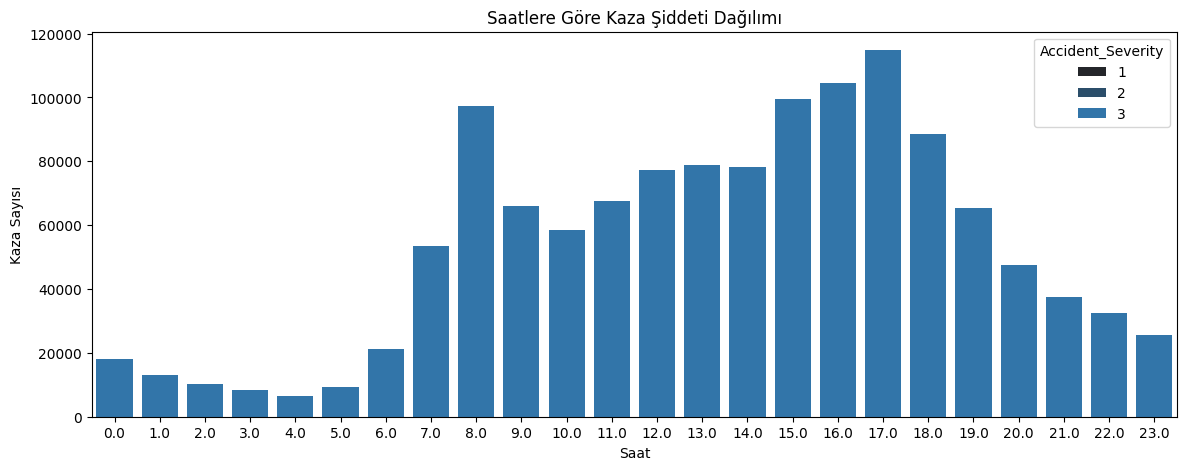

In [ ]:
df_acc['Hour'] = pd.to_datetime(df_acc['Time'], errors='coerce').dt.hour

plt.figure(figsize=(14,5))
sns.countplot(data=df_acc, x='Hour', hue='Accident_Severity', palette='dark:#1e77bd', dodge=False)
plt.title("Saatlere Göre Kaza Şiddeti Dağılımı")
plt.xlabel("Saat")
plt.ylabel("Kaza Sayısı")
plt.show()

###Saatlere Göre **Kaza Şiddeti** Dağılımı

**Ortanca:**
- Günün ortasına denk gelen 12:00–14:00 saat aralığı, ortalama kaza yoğunluğunu temsil ediyor.

**Ortalama:**
- Kazalar sabah saatlerinde artmaya başlıyor ve **17:00** saatinde zirve yapıyor.
- En düşük kaza sayısı **04:00** civarında kaydedilmiş.

**Dağılım:**
- Gece yarısından sonra (00:00–06:00) oldukça düşük seviyelerde kaza gözleniyor.
- 07:00 itibarıyla hızlı bir artış başlıyor, 08:00 ve 17:00 saatleri arasında dalgalı ama yüksek bir kaza yoğunluğu izleniyor.
- 19:00 sonrası kazalarda hızlı bir azalma gözleniyor.

###- **Sabah işe gidiş (07:00–09:00)** ve **akşam iş çıkışı (16:00–18:00)** saatlerinde kaza yoğunluğu zirve yapmaktadır.
###- Trafik akışının yoğunlaştığı bu zaman dilimleri için trafik güvenliği önlemleri artırılmalı, toplu taşıma teşvik edilmeli ve sürücüler bu saatlerde daha dikkatli olmaları için bilinçlendirilmeli.

##Kazaları Artıran Faktörler: Genel Değerlendirme

Trafik kazalarının yoğunluğu ve şiddeti; hava koşulları, yol tipi, aydınlatma durumu ve zaman gibi çevresel faktörlerden önemli ölçüde etkilenmektedir. Bu analizde 2005–2014 dönemine ait veriler doğrultusunda aşağıdaki bulgular elde edilmiştir:

---

###**Hava Durumu**
- En fazla kaza **"Fine without high winds"** (rüzgarsız açık hava) durumunda gerçekleşmiştir.
- Bu, sürücülerin iyi hava koşullarında daha rahat davranmalarıyla açıklanabilir.
- Diğer hava durumlarında kaza sayısı oldukça düşüktür; özellikle sis, kar ve yüksek rüzgar gibi durumlarda sürücüler daha temkinli davranmaktadır.

---

###**Yol Tipi**
- Açık ara farkla en fazla kaza **"Single carriageway"** (tek yönlü çift şeritli yollar) üzerinde meydana gelmiştir.
- **"Dual carriageway"** ve **"Roundabout"** gibi daha kontrollü yol tiplerinde kaza oranı düşüktür.
- Bu, şehir içi trafiğin yoğun olduğu, karmaşık manevraların daha sık yaşandığı yol tiplerinde kaza riskinin arttığını göstermektedir.

---

###**Aydınlatma Koşulları**
- Kazaların büyük bölümü **gündüz vakti (street light present)** meydana gelmiştir.
- Gece saatlerinde aydınlatmanın olduğu bölgelerde de önemli sayıda kaza gözlenmiştir.
- Ancak **hiç ışık bulunmayan** ya da **ışıklar çalışmayan** bölgelerdeki kazalar az da olsa yüksek risk taşımaktadır.

---

###**Zaman (Gün ve Saat)**
- Haftanın en fazla kaza gerçekleşen günü **Cumartesi (6)** olarak tespit edilmiştir. Bu günü **Cuma ve Perşembe** takip etmektedir.
- Günlük saat dağılımına bakıldığında kazalar:
  - Sabah **08:00** saatinde hızlıca yükselmeye başlamakta,
  - **17:00** saatinde zirve yapmaktadır.
  - Bu da **işe gidiş (07:00–09:00)** ve **iş çıkışı (16:00–18:00)** saatlerinde kazaların yoğunlaştığını açıkça ortaya koymaktadır.

---

###**Genel Sonuç ve Öneriler**
####- **En yüksek risk faktörleri**: Tek yönlü yollar, açık hava koşulları ve iş saatleri trafiği.
###- **Önleyici stratejiler**:
####- Bu saatlerde denetimlerin artırılması,
####- Şehir planlamasında tek şeritli yolların trafiğe etkisinin yeniden değerlendirilmesi,
####- Aydınlatmanın yetersiz olduğu bölgelerin tespit edilerek iyileştirilmesi,
####-Hafta sonu sürücüleri için hız kontrolü ve bilgilendirme kampanyalarının yapılması önerilir.

###Bu analiz, trafik kazalarının sadece sürücü hatasından değil, **çevresel ve zamansal faktörlerden** de yoğun biçimde etkilendiğini göstermektedir.

#**Kaza Oranlarını Tahminleme**

##**Yıllara Göre Toplam Kaza Sayısı**

In [3]:
plt.figure(figsize=(8,5))
sns.set_style("white")

yearly_accidents = df_acc['Year'].value_counts().sort_index()

sns.lineplot(x=yearly_accidents.index, y=yearly_accidents.values, marker="o", linewidth=2.5)

plt.title("Yıllara Göre Toplam Kaza Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'df_acc' is not defined

<Figure size 800x500 with 0 Axes>

###Yıllara Göre **Toplam Kaza Sayısı** Dağılımı

**• Ortanca:** Grafik üzerinde ortanca değeri doğrudan görmek zor olsa da, kaza sayılarının 130.000–140.000 civarında yoğunlaştığı görülüyor.  
**• Ortalama:** Ortalama kaza sayısı da benzer şekilde yaklaşık 135.000–140.000 arasında seyrediyor.  
**• Dağılım:** 2000 yılında 160.000 civarında olan kaza sayısı, yıllar içinde düzenli biçimde azalarak 2016 yılında 118.000 seviyelerine düşmüş.  
###Kaza sayılarında yıllara yayılan istikrarlı bir düşüş trendi gözlemlenmektedir. Bu da, alınan önlemlerin etkili olduğunu veya trafiğin daha güvenli hâle geldiğini gösterebilir. Mevcut trend, gelecekte de kaza sayılarının azalmaya devam edeceğini öngörmektedir.

##**Mevsimsel Değişkenlik**

In [ ]:
df_acc['Date'] = pd.to_datetime(df_acc['Date'], errors='coerce')

df_acc['Month'] = df_acc['Date'].dt.month

month_names = {
    1: 'Ocak', 2: 'Şubat', 3: 'Mart', 4: 'Nisan', 5: 'Mayıs', 6: 'Haziran',
    7: 'Temmuz', 8: 'Ağustos', 9: 'Eylül', 10: 'Ekim', 11: 'Kasım', 12: 'Aralık'
}
df_acc['Month_Name'] = df_acc['Month'].map(month_names)

ordered_months = list(month_names.values())
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

sns.barplot(x='Month_Name', y='Accident_Index', data=df_acc, estimator='count', order=ordered_months)

plt.title("Aylara Göre Kaza Sayısı")
plt.xlabel("Ay")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Aylara Göre **Kaza Sayısı** Dağılımı

**Ortanca:**
- Her ayda benzer yoğunlukta kaza görülse de özellikle Temmuz ve Kasım aylarında ortalama kazalar artış göstermektedir.

**Ortalama:**
- Yaz (Haziran–Temmuz–Ağustos) ve sonbahar aylarında (özellikle Kasım) kaza sayısı yükselme eğilimindedir.
- Şubat gibi kısa ve kışın sert aylarında ise kaza sayısı göreli olarak daha düşüktür.

**Dağılım:**
- Aylık dağılımda belirgin bir mevsimsellik gözlenmektedir: Yaz ayları ve sonbahar başı daha riskli dönemlerdir.
- Bu dönemlerde tatil, seyahat yoğunluğu veya değişen hava koşulları etkili olabilir.

###- Yaz aylarında artan yol trafiği ve sonbaharda görüş koşullarının kötüleşmesi (örneğin Kasım) kaza riskini artırıyor olabilir.
###- Mevsimsel etkiler göz önüne alınarak, özellikle bu aylarda trafik kontrolleri ve uyarı sistemleri yoğunlaştırılmalıdır.

#**Lineer Regresyon ile Zaman Trendi**

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

accidents_by_year = df_acc.groupby('Year').size().reset_index(name='Accident_Count')

X = accidents_by_year['Year'].values.reshape(-1,1)
y = accidents_by_year['Accident_Count'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
plt.plot(accidents_by_year['Year'], accidents_by_year['Accident_Count'], marker='o', label='Gerçek Değerler')
plt.plot(accidents_by_year['Year'], y_pred, color='red', linestyle='--', label='Lineer Regresyon Trendi')
plt.title("Yıllara Göre Kaza Sayısı ve Trend Çizgisi")
plt.xlabel("Yıl")
plt.ylabel("Toplam Kaza Sayısı")
plt.legend()
plt.tight_layout()
plt.show()

###Yıllara Göre Kaza Sayısı ve Trend Çizgisi (Lineer Regresyon)

**Ortanca:**
- Genel dağılımda yıllar boyunca yıllık kaza sayıları 150.000–220.000 arasında seyretmiştir.

**Ortalama:**
- Grafik, 2005–2014 yılları arasında kaza sayısının **azalma eğilimi** gösterdiğini ortaya koymaktadır.

**Dağılım:**
- 2006–2008 arasında kaza sayısı oldukça yüksektir. Sonrasında düşüş başlar.
- 2012–2014 yıllarında ise en düşük seviyeler görülmektedir.

###- Lineer regresyon modeline göre, yıllar içinde trafik kazalarında **düşüş eğilimi** mevcuttur.
###- Bu azalış, trafik önlemlerinin, yasal düzenlemelerin ve güvenlik uygulamalarının etkili olduğunu göstermektedir.
###- Ancak bu eğilim genel bir trendi gösterse de, bazı yıllarda ani artışlar (örneğin 2008 gibi) görülebilmektedir. Bu nedenle sadece lineer model yerine zaman serisi analizleriyle daha doğru tahminler yapılabilir.

#**Kırsal ve Kentsel Alan Farkları

##**Ortalama Kaza Sayıları**

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")

sns.barplot(x='Urban_or_Rural_Area', y='Number_of_Vehicles', data=df_acc, estimator='mean')

plt.title('Kırsal ve Kentsel Alanlara Göre Ortalama Kaza Sayısı')
plt.xlabel('Alan Tipi (0: Kırsal, 1: Kentsel)')
plt.ylabel('Ortalama Kaza Sayısı')
plt.show()

###Kırsal ve Kentsel Alanlara Göre **Ortalama Kaza Sayısı** Dağılımı

**• Ortanca:** Kırsal alanlarda ortalama kaza sayısı daha düşüktür; kentsel alanlarda daha yüksektir.

**• Ortalama:** Kentsel alanlarda bir kaza başına düşen araç sayısı (yani "Number_of_Vehicles") kırsal alanlara göre daha fazladır. Bu da ortalama olarak daha fazla aracın karıştığı kazalar anlamına gelir.

**• Dağılım:** Grafikte açıkça görüldüğü üzere, kentsel alanlar daha yoğun trafik ve araç sayısına sahip olduğundan dolayı kaza başına düşen araç sayısı da artmaktadır.

###Kentsel alanlarda trafik yoğunluğunun daha fazla olması, daha çok aracın karıştığı kazaların meydana gelmesine neden olmaktadır. Bu da şehir içi kazaların hem sayı hem de karmaşıklık açısından daha büyük olabileceğini gösteriyor.

##**Ölümlü Kazalar Yüzdesi**

In [ ]:
# Alanlara göre toplam kaza sayısı
total = df_acc.groupby('Urban_or_Rural_Area')['Accident_Index'].count()

# Alanlara göre sadece ölümcül kazalar (1: Fatal)
fatal = df_acc[df_acc['Accident_Severity'] == 1].groupby('Urban_or_Rural_Area')['Accident_Index'].count()

fatal_rate = (fatal / total * 100).reset_index()
fatal_rate.columns = ['Urban_or_Rural_Area', 'Fatal_Accident_Percentage']

plt.figure(figsize=(7,5))
sns.set_style("whitegrid")

sns.barplot(x='Urban_or_Rural_Area', y='Fatal_Accident_Percentage', data=fatal_rate)

plt.title('Kırsal ve Kentsel Alanlarda Ölümlü Kaza Yüzdesi')
plt.xlabel('Alan Tipi (0: Kırsal, 1: Kentsel)')
plt.ylabel('Ölümlü Kazaların Yüzdesi (%)')
plt.show()

###Kırsal ve Kentsel Alanlara Göre **Ölümlü Kaza Yüzdesi** Dağılımı

**• Ortanca:** Ölümlü kaza oranı kırsal alanlarda belirgin şekilde daha yüksektir.

**• Ortalama:** Kırsal alanlarda gerçekleşen kazaların yaklaşık %2.5–3'ü ölümlü iken, kentsel alanlarda bu oran %1'in altındadır.

**• Dağılım:** Grafik, kırsalda kaza sayısı az olsa da bu kazaların daha ölümcül sonuçlar doğurduğunu göstermektedir.

###Kırsal alanlarda yol yapısı, hız sınırlarının yüksek olması ve acil müdahale imkanlarının sınırlı oluşu, ölümlü kazaların oranını artırmaktadır. Kentsel alanlarda ise kazalar daha sık olsa da genellikle daha az ölümcüldür.

##**Yaygın Kaza Türleri**

In [ ]:
severity_counts = df_acc.groupby(['Urban_or_Rural_Area', 'Accident_Severity'])['Accident_Index'].count().reset_index()

total_by_area = severity_counts.groupby('Urban_or_Rural_Area')['Accident_Index'].transform('sum')
severity_counts['Percentage'] = (severity_counts['Accident_Index'] / total_by_area) * 100

severity_map = {1: 'Ölümcül', 2: 'Ciddi', 3: 'Hafif'}
severity_counts['Kaza Türü'] = severity_counts['Accident_Severity'].map(severity_map)
area_map = {0: 'Kırsal', 1: 'Kentsel'}
severity_counts['Alan'] = severity_counts['Urban_or_Rural_Area'].map(area_map)

plt.figure(figsize=(7,5))
sns.set_style("whitegrid")

sns.barplot(x='Kaza Türü', y='Percentage', hue='Alan', data=severity_counts)

plt.title('Kırsal ve Kentsel Alanlara Göre Kaza Türleri Dağılımı')
plt.xlabel('Kaza Türü')
plt.ylabel('Yüzde (%)')
plt.legend(title='Alan')
plt.show()

###Kırsal ve Kentsel Alanlara Göre **Kaza Türleri** Dağılımı

**• Ortanca:** Hem kırsal hem de kentsel alanlarda en sık görülen kaza türü "hafif"tir. Ancak oranlar farklılık gösterir.

**• Ortalama:**
- Kentsel bölgelerde hafif kazaların oranı %85’in üzerindedir.
- Kırsal bölgelerde hafif kaza oranı daha düşüktür, ciddi ve ölümcül kazaların oranı kırsala göre daha fazladır.

**• Dağılım:**
- Kentsel alanlarda hafif kazalar baskınken, kırsal alanlarda ciddi ve ölümcül kazaların oranı görece daha yüksektir.
- Bu fark yol koşulları, hız limitleri ve sağlık hizmetlerine erişimle ilgili olabilir.

###Kırsalda kaza sayısı daha az olsa da bu kazalar daha tehlikeli sonuçlar doğurabilir. Kentselde ise kazaların büyük kısmı düşük şiddetlidir.

#**Sonuç**

###Bu analiz, 2000–2016 yılları arasında Birleşik Krallık’ta gerçekleşen trafik kazalarına odaklanarak kaza sayılarını etkileyen çevresel, zamansal ve mekânsal faktörleri incelemiştir. Elde edilen temel bulgular aşağıda özetlenmiştir:

---

###Yıllar İçinde Kaza Sayısı
- Yıllara göre toplam kaza sayısı **istikrarlı bir düşüş eğilimi** göstermektedir.
- Bu azalma, alınan **trafik önlemleri, yasal düzenlemeler** ve **güvenlik uygulamalarının** etkili olduğunu düşündürmektedir.
- Lineer regresyon analizi de bu azalma trendini doğrulamıştır.

---

###Aylara Göre Mevsimsel Değişim
- Yaz (Haziran–Ağustos) ve sonbahar (özellikle Kasım) aylarında **kaza sayısında artış** gözlemlenmiştir.
- Bu dönemler, **tatil ve seyahat trafiği**, değişen **hava koşulları** gibi mevsimsel faktörlerden etkilenmektedir.
- Şubat gibi kışın sert aylarında ise kaza sayıları daha düşüktür.

---

###Kırsal ve Kentsel Farklılıklar
- **Kentsel alanlarda**, trafik yoğunluğunun fazla olması nedeniyle **daha fazla kaza** meydana gelmektedir.
- Ancak **kırsal alanlarda** daha az kaza olmasına rağmen, **ölümcül kaza oranı** daha yüksektir.
  - Kırsalda yol yapısı, hız sınırları ve acil müdahale imkanlarının sınırlı olması etkili olabilir.
- **Kaza türü açısından**:
  - Kentsel alanlarda %85’in üzerindeki kazalar **hafif şiddetli** iken,
  - Kırsal bölgelerde **ciddi ve ölümcül kazaların oranı** daha fazladır.

---

###Diğer Bulgular
- En çok kaza Cumartesi günleri ve özellikle **08:00 ve 17:00 saatlerinde** yoğunlaşmaktadır.
- Açık hava koşulları ve gündüz saatlerinde daha fazla kaza yaşanması, sürücülerin **güvenli koşullarda daha rahat davranmalarıyla** açıklanabilir.
- En çok kaza, **tek şeritli çift yönlü yollar** ("Single carriageway") üzerinde gerçekleşmiştir.

---

##Genel Değerlendirme
###Trafik kazaları sadece sürücü hatalarından değil, **çevresel, zamansal ve mekânsal faktörlerden** de yoğun biçimde etkilenmektedir. Bu analiz, kazaların önlenmesinde **veriye dayalı planlama** ve **hedefli müdahalelerin** önemini ortaya koymaktadır.

---